In [1]:
# examples taken from Chapter 3 - Adversarial examples, solving the inner maximization
# Adversarial robustness tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time
import scipy.stats as stat

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
#from tf_verify.read_net_file import read_onnx_net,read_tensorflow_net

import onnx, onnxruntime
from utils import normalize, dichotomic_search, nn_score, graph_model_converter
#import model_loader

from sampling_tools import ImportanceSampling, ImportanceSplittingLp
from utils import project_ball, uniform_ball_gen, epoch, normal_kernel

ImportError: cannot import name 'epoch' from 'utils' (/home/karim-tito/sampling-reliability-measure/karimtito_reliability_meassure/utils.py)

In [ ]:
tf.config.list_physical_devices('GPU')

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
flatten_mnist_tf = lambda x: x.astype(np.float64).reshape((x.shape[0],np.prod(x.shape[1:])))/np.float64(255)
X_train_f, X_test_f = flatten_mnist_tf(X_train), flatten_mnist_tf(X_test)
modelBig, is_conv,mean, std,=eran_net_reader.read_tf_net("/home/karim-tito/provero/nets/pytorch/mnist/convBigRELU__DiffAI.pyt", shape=(None,784),is_trained_with_pytorch=True,batch_mode=True)

W shape (3, 3, 1, 32)
(None, 28, 28, 32)
Conv2D {'filters': 32, 'kernel_size': [3, 3], 'input_shape': [28, 28, 1], 'stride': [1, 1], 'padding': 1} W.shape: (3, 3, 1, 32) b.shape: (32,)
	OutShape:  (None, 28, 28, 32)
W shape (4, 4, 32, 32)
(None, 14, 14, 32)
Conv2D {'filters': 32, 'kernel_size': [4, 4], 'input_shape': [28, 28, 32], 'stride': [2, 2], 'padding': 1} W.shape: (4, 4, 32, 32) b.shape: (32,)
	OutShape:  (None, 14, 14, 32)
W shape (3, 3, 32, 64)
(None, 14, 14, 64)
Conv2D {'filters': 64, 'kernel_size': [3, 3], 'input_shape': [14, 14, 32], 'stride': [1, 1], 'padding': 1} W.shape: (3, 3, 32, 64) b.shape: (64,)
	OutShape:  (None, 14, 14, 64)
W shape (4, 4, 64, 64)
(None, 7, 7, 64)
Conv2D {'filters': 64, 'kernel_size': [4, 4], 'input_shape': [14, 14, 64], 'stride': [2, 2], 'padding': 1} W.shape: (4, 4, 64, 64) b.shape: (64,)
	OutShape:  (None, 7, 7, 64)
ReLU
	OutShape:  (None, 512)
	WShape:  (3136, 512)
	BShape:  (512,)
ReLU
	OutShape:  (None, 512)
	WShape:  (512, 512)
	BShape:  (51

In [7]:

batch_size = 512
image = X_train_n[:batch_size]
modelBigCV = graph_model_converter(modelBig)
predictions = modelBigCV(x=X_train_n[:batch_size])
preds = np.argmax(predictions,1)
ind_valid_preds = (preds[:batch_size] == y_test[:batch_size])
print(ind_valid_preds.mean())
X_valid = X_train_n[:batch_size][ind_valid_preds][:100]

NameError: name 'X_train_n' is not defined

In [5]:
modelBigCV(np.array([X_train_n[0]]))

array([[-5.75954381, -3.08239086, -2.77742298,  0.80550401, -0.9371737 ,
        -3.37601848, -5.73609379,  5.46920694, -5.12052849,  0.01288142]])

In [5]:
p_c = 10**-30
N=20
confidence_level_m = lambda m :stat.gamma.sf(-np.log(p_c),a=m, scale =1/N) 
m_p_c = dichotomic_search(f=confidence_level_m, a=100, b=10**5, thresh=0.96)

In [6]:
m_p_c

(1447.4635616497985, 0.9600000000000605)

In [ ]:
Lp_est = ImportanceSplittingLp(gaussian_gen_d, normal_kernel, N=16,s=1,  h=h_0_x_dnn_2, tau=0 , n_max=5000, decay=0.99, n_mod=30, accept_ratio = 2/3., verbose = 1)


# Testing the last particle Importance Splitting robustness estimator

## 1. MNIST DNNs and CNN

In [32]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)    

model_dnn_2 = nn.Sequential(Flatten(), nn.Linear(784,200), nn.ReLU(), 
                            nn.Linear(200,10)).to(device)

model_dnn_4 = nn.Sequential(Flatten(), nn.Linear(784,200), nn.ReLU(), 
                            nn.Linear(200,100), nn.ReLU(),
                            nn.Linear(100,100), nn.ReLU(),
                            nn.Linear(100,10)).to(device)

model_cnn = nn.Sequential(nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
                          nn.Conv2d(32, 32, 3, padding=1, stride=2), nn.ReLU(),
                          nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
                          nn.Conv2d(64, 64, 3, padding=1, stride=2), nn.ReLU(),
                          Flatten(),
                          nn.Linear(7*7*64, 100), nn.ReLU(),
                          nn.Linear(100, 10)).to(device)


In [33]:
torch.manual_seed(0) #setting seeds reproducibility
np.random.seed(0)
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

mnist_train = datasets.MNIST("../data", train=True, download=False, transform=transforms.ToTensor())
mnist_test = datasets.MNIST("../data", train=False, download=False, transform=transforms.ToTensor())
train_loader = DataLoader(mnist_train, batch_size = 100, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size = 100, shuffle=False)

for X,y in test_loader:
    X,y = X.to(device), y.to(device)
    break

In [34]:
model_dnn_2.load_state_dict(torch.load("model_dnn_2.pt"))
model_dnn_4.load_state_dict(torch.load("model_dnn_4.pt"))
model_cnn.load_state_dict(torch.load("model_cnn.pt"))

<All keys matched successfully>

In [ ]:
mnist_relu_3_50

In [35]:
flatten_mnist_np = lambda x: x.astype(np.float64).reshape((x.shape[0],np.prod(x.shape[1:])))
flatten_mnist_tf = lambda x: x.cpu().numpy().reshape((x.shape[0],np.prod(x.shape[1:]))).astype(np.float64)
X_f = flatten_mnist_tf(X)

In [36]:
X_f.shape

(100, 784)

In [37]:
x_0 = X[0].cpu().numpy()
y_0 = y.cpu().numpy()[0]
d = x_0.size
flatten_mnist_pyt = lambda x: x.reshape(x.shape[:-3]+(np.prod(x.shape[-2:]),))
reshape_mnist_pyt = lambda x: x.reshape(x.shape[:-1]+(1,28,28))
x_0f = flatten_mnist_pyt(x_0)

In [43]:
type(x_0f)

numpy.ndarray

In [40]:
modelBigCV(x_0f)

array([[-5.62651188, -2.00951877, -2.75096443,  0.88695191, -0.90574596,
        -3.272293  , -5.51896064,  5.16814171, -5.30502674,  0.03031797]])

In [60]:
def score(X, original_label, model, clipping_in=True ,clipping_out=True, mean=None, std=None, is_torch=False):
    if len(X.shape)>1:
        logits = model(X)
    else:
        logits = model(np.array([X]))
    logits = logits.cpu().detach().numpy()
    score = np.max(np.delete(logits,[original_label], axis=1), axis =1)- logits[:,      original_label]
    if clipping:
        score = np.clip(score, a_min=-np.ing, a_max =0)

    return score


In [47]:
gaussian_gen_d = lambda N: np.random.normal(size = (N,d))

normal_kernel = lambda x,s : (x + s*np.random.normal(size = x.shape))/np.sqrt(1+s**2) 

In [48]:
transform_eps = lambda x: np.clip(x_0[None]+ reshape_mnist_pyt(eps*(2*stat.norm.cdf(x)-1)), a_min=0, a_max=1)

s_dnn_2 = 1

s_dnn_4=1


In [49]:
def build_score_functions(model_list,epsilon):
    transform_eps = lambda x: np.clip(x_0[None]+ reshape_mnist_pyt(eps*(2*stat.norm.cdf(x)-1)),                 a_min=0, a_max=1)
    score_functions=[]

    for model in model_list:
        h_u = -score(torch.from_numpy(u).to(device).float(), original_label=y_0,                        model=model, clipping=False)
        h_x = h_u(transform_eps(x))
        score_functions.append(h_x)

    return score_functions

In [50]:
model_names = ['DNN_2','DNN_4','CNN']


In [51]:
idx =[]
columns = ['Estimated prob. of failure','CI','Estimated variance', 'Calls','Compute Time (s)','Avg. rejection rate']
res_df = pd.DataFrame(index=idx,columns= columns)

In [20]:
model_names = ['DNN_2','DNN_4','CNN']
s_dnn_2, s_dnn_4, s_cnn = 1, 1, 1
decay_rate = 0.999
slow_decay_rate = 0.9995
rej_thresh = 0.5

epsilon_range = np.linspace(0.2,0.5,num=9)
for eps in epsilon_range:
    transform_eps = lambda x: np.clip(x_0[None]+ reshape_mnist_pyt(eps*(2*stat.norm.cdf(x)-1)),                 a_min=0, a_max=1)
    h_0_u_dnn_2 = lambda u: -conditional_V(torch.from_numpy(u).to(device).float(), original_label=y_0,     model=model_dnn_2, clipping=False)
    h_0_x_dnn_2 = lambda x: h_0_u_dnn_2(transform_eps(x))
    h_0_u_dnn_4 = lambda u: -conditional_V(torch.from_numpy(u).to(device).float(), original_label=y_0,     model=model_dnn_4,clipping =False )
    h_0_x_dnn_4 = lambda x: h_0_u_dnn_4(transform_eps(x))

    h_0_u_cnn = lambda u: -conditional_V(torch.from_numpy(u).to(device).float(), original_label=y_0,       model=model_cnn, clipping=False)
    h_0_x_cnn = lambda x: h_0_u_cnn(transform_eps(x))
    
    score_functions = [h_0_x_dnn_2,h_0_x_dnn_4,h_0_x_cnn ]
    strengths = [s_dnn_2, s_dnn_4, s_cnn]
    results=[]



    for i in range(len(score_functions)):
        #mean_pred = 0
        res = ImportanceSplitting(gaussian_gen_d, normal_kernel,K=15, N=16,s=strengths[i],         h=score_functions[i],           T=8,   tau=0 , n_max=64000, track_rejection=True, rejection_ctrl=True, decay=decay_rate,                              rej_threshold=0.25, prog_thresh=0.1, gain_rate = 1.0001/decay_rate)
        results.append(res)
    idx=[name+f'[eps={eps}]' for name in model_names]
        
    for res, name in zip(results, idx):
        s_out = res[1]
        CI = s_out['CI_est']
        c1,c2 = '{:.3e}'.format(CI[0]),'{:.3e}'.format(CI[1])
        res_df.loc[name]=round_str(res[0]),f"[{c1},{c2}]",round_str(s_out['Var_est']),s_out['Count_h'],             compute_times[name], s_out['Avg. rejection rate']

el increased!
s=0.007451426760905693
Iter =  19993  tau_j =  -3.0035543 h_mean -3.002687  Calls =  159952
Rejection rate: 0.9981659768629852
Strength of kernel diminished!
s=0.007443975334144788
Strength of kernel increased!
s=0.007452171903581784
Iter =  19994  tau_j =  -3.003529 h_mean -3.0026622  Calls =  159960
Rejection rate: 0.9981659997963012
Strength of kernel diminished!
s=0.007444719731678202
Strength of kernel increased!
s=0.007452917120772142
Iter =  19995  tau_j =  -3.0035226 h_mean -3.002662  Calls =  159968
Rejection rate: 0.9981660227282549
Strength of kernel diminished!
s=0.00744546420365137
Strength of kernel increased!
s=0.007453662412484219
Iter =  19996  tau_j =  -3.0035083 h_mean -3.0024552  Calls =  159976
Rejection rate: 0.9981660456589901
Strength of kernel diminished!
s=0.007446208750071735
Strength of kernel increased!
s=0.0074544077787254675
Iter =  19997  tau_j =  -3.0034263 h_mean -3.002392  Calls =  159984
Rejection rate: 0.998166068588507
Strength of ker

KeyboardInterrupt: 

In [52]:
eps =0.1
transform_eps = lambda x: np.clip(x_0[None]+ reshape_mnist_pyt(eps*(2*stat.norm.cdf(x)-1)),                 a_min=0, a_max=1)
h_0_u_dnn_2 = lambda u: -conditional_V(torch.from_numpy(u).to(device).float(), original_label=y_0,     model=model_dnn_2, clipping=False)
h_0_x_dnn_2 = lambda x: h_0_u_dnn_2(transform_eps(x))
h_0_u_dnn_4 = lambda u: -conditional_V(torch.from_numpy(u).to(device).float(), original_label=y_0,     model=model_dnn_4,clipping =False )
h_0_x_dnn_4 = lambda x: h_0_u_dnn_4(transform_eps(x))

h_0_u_cnn = lambda u: -conditional_V(torch.from_numpy(u).to(device).float(), original_label=y_0,       model=model_cnn, clipping=False)
h_0_x_cnn = lambda x: h_0_u_cnn(transform_eps(x))

In [53]:
t  = time()
res = ImportanceSplitting(gaussian_gen_d, normal_kernel,K=15, N=16,s=strengths[i],h=h_0_x_dnn_2 , T=8, tau=0 , n_max=25000, track_rejection=True, rejection_ctrl=True,decay=decay_rate,rej_threshold=0.25, prog_thresh=0.1, gain_rate = 1.0001/decay_rate)
compute_time_dnn_2 = time()-t

NameError: name 'ImportanceSplitting' is not defined

In [25]:
print(f'Estimated reliability of 2-Layers DNN: {Lp_est_dnn_2[0]}')
print(f'Compute time for 2-Layers DNN: {compute_time_dnn_2}')

Estimated reliability of 2-Layers DNN: 2.3274184716484526e-10
Compute time for 2-Layers DNN: 38.56062078475952


No handles with labels found to put in legend.


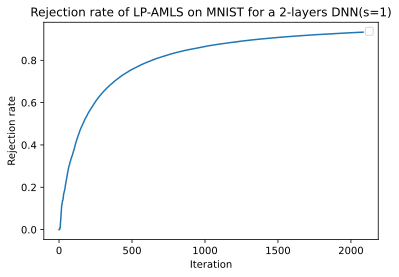

In [23]:
s_out_dnn_2 = Lp_est_dnn_2[1]
s_out_dnn_2['Avg. rejection rate']
r = s_out_dnn_2['rejection_rates']
T_dnn_2 = np.arange(len(r))
plt.xlabel('Iteration')
plt.ylabel('Rejection rate')
plt.plot(T_dnn_2,r)
plt.title(f'Rejection rate of LP-AMLS on MNIST for a 2-layers DNN(s={s_dnn_2})')
plt.legend()

In [32]:
t = time() 
Lp_est_dnn_4 = ImportanceSplitting(gaussian_gen_d, normal_kernel,K=99, N=100,s=1,  h=h_0_x_dnn_4, tau=0 , n_max=5000, track_rejection=True)
compute_time_dnn_4 = time()-t

alls =  26320
Rejection rate: 0.8374640707901231
Iter =  876  tau_j =  -0.5255914 h_mean -0.30264643  Calls =  26350
Rejection rate: 0.8376250710303262
Iter =  877  tau_j =  -0.5240841 h_mean -0.30207807  Calls =  26380
Rejection rate: 0.8377733819224719
Iter =  878  tau_j =  -0.5221238 h_mean -0.30152476  Calls =  26410
Rejection rate: 0.8379583609624691
Iter =  879  tau_j =  -0.51718044 h_mean -0.30053037  Calls =  26440
Rejection rate: 0.8381121728136192
Iter =  880  tau_j =  -0.517004 h_mean -0.29658127  Calls =  26470
Rejection rate: 0.8382595266005429
Iter =  881  tau_j =  -0.51691294 h_mean -0.29452372  Calls =  26500
Rejection rate: 0.8383881979602975
Iter =  882  tau_j =  -0.5151844 h_mean -0.29032618  Calls =  26530
Rejection rate: 0.8385471936280771
Iter =  883  tau_j =  -0.5143733 h_mean -0.28564093  Calls =  26560
Rejection rate: 0.8387180516940459
Iter =  884  tau_j =  -0.51181936 h_mean -0.28198642  Calls =  26590
Rejection rate: 0.8388885331182467
Iter =  885  tau_j =  

In [183]:
print(f'Estimated reliability of 4-Layers DNN: {Lp_est_dnn_4[0]}')
print(f'Compute time for 4-Layers DNN: {compute_time_dnn_4}')

Estimated reliability of 4-Layers DNN: 2.24637494411274e-05
Compute time for 4-Layers DNN: 21.538496494293213


No handles with labels found to put in legend.


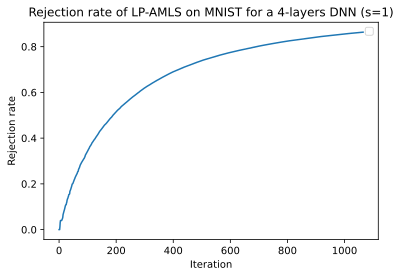

In [184]:
s_out_dnn_4 = Lp_est_dnn_4[1]
s_out_dnn_4['Avg. rejection rate']
r = s_out_dnn_4['rejection_rates']
T = np.arange(len(r))
plt.xlabel('Iteration')
plt.ylabel('Rejection rate')
plt.plot(T,r)
plt.title(f'Rejection rate of LP-AMLS on MNIST for a 4-layers DNN (s={s_dnn_4})')
plt.legend()

In [40]:
t = time() 
Lp_est_cnn = ImportanceSplitting(gaussian_gen_d, normal_kernel,K=99, N=100,s=s_cnn,  h=h_0_x_cnn, tau=0 , n_max=15000, track_rejection=True)
compute_time_cnn = t-time()

  11546  tau_j =  -0.082657814 h_mean -0.040189408  Calls =  346450
Rejection rate: 0.9525423726710682
Iter =  11547  tau_j =  -0.08246899 h_mean -0.039769486  Calls =  346480
Rejection rate: 0.9525423726710682
Iter =  11548  tau_j =  -0.082341194 h_mean -0.038944796  Calls =  346510
Rejection rate: 0.9525429206988154
Iter =  11549  tau_j =  -0.08186436 h_mean -0.038235653  Calls =  346540
Rejection rate: 0.9525429206988154
Iter =  11550  tau_j =  -0.08174801 h_mean -0.03741701  Calls =  346570
Rejection rate: 0.9525429206988154
Iter =  11551  tau_j =  -0.08142853 h_mean -0.037370797  Calls =  346600
Rejection rate: 0.9525436055178035
Iter =  11552  tau_j =  -0.08123112 h_mean -0.036556512  Calls =  346630
Rejection rate: 0.9525436055178035
Iter =  11553  tau_j =  -0.07918644 h_mean -0.036315795  Calls =  346660
Rejection rate: 0.9525444271715864
Iter =  11554  tau_j =  -0.07841492 h_mean -0.036043808  Calls =  346690
Rejection rate: 0.9525444271715864
Iter =  11555  tau_j =  -0.077716

No handles with labels found to put in legend.


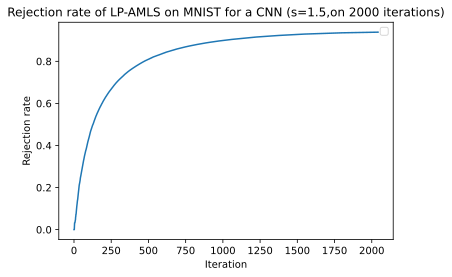

In [189]:
s_out_cnn = Lp_est_cnn[1]
s_out_cnn['Avg. rejection rate']
r = s_out_cnn['rejection_rates']
T_cnn = np.arange(len(r))
plt.xlabel('Iteration')
plt.ylabel('Rejection rate')
plt.plot(T_dnn_2,r[:len(T_dnn_2)])
plt.title(f'Rejection rate of LP-AMLS on MNIST for a CNN (s={s_cnn},on 2000 iterations)')
plt.legend()

In [175]:
res_df.index.rename('Model architecture', inplace=True)

In [177]:
s_out_cnn['rejection_rates']

array([0.        , 0.        , 0.        , ..., 0.95264052, 0.95264052,
       0.95264119])

In [176]:
res_df

,Estimated prob. of failure,CI,Estimated variance,Calls,Compute Time (s),Avg. rejection rate
Model architecture,,,,,,
DNN_2,1.222e-09,"[1.342e-10,2.310e-09]",3.080e-19,61360,40.094421,0.923358
DNN_4,2.246e-05,"[8.023e-06,3.690e-05]",5.428e-11,32050,21.538496,0.863507
CNN,6.450e-52,"[-7.310e-52,2.021e-51]",4.928e-103,351940,309.603761,0.952641


In [42]:
print(f'Estimated reliability of CNN: {Lp_est_cnn[0]}')
print(f'Compute time for CNN: {-compute_time_cnn}')

Estimated reliability of CNN: 6.450037506973133e-52
Compute time for CNN: 309.6037611961365


In [159]:
res_df

,Estimated prob. of failure,CI,Estimated variance,Calls,Compute Time (s),Avg. rejection rate
DNN_2,NaN,NaN,NaN,NaN,NaN,NaN
DNN_4,NaN,NaN,NaN,NaN,NaN,NaN
CNN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:

compute_times = {'DNN_2':compute_time_dnn_2,'DNN_4' :compute_time_dnn_4,'CNN':-compute_time_cnn}

In [161]:
compute_times

{'DNN_2': 40.09442090988159,
 'DNN_4': 21.538496494293213,
 'CNN': 309.6037611961365}

In [170]:
res_df

,Estimated prob. of failure,CI,Estimated variance,Calls,Compute Time (s),Avg. rejection rate
DNN_2,1.222e-09,"[1.342e-10,2.310e-09]",3.080e-19,61360,40.094421,0.923358
DNN_4,2.246e-05,"[8.023e-06,3.690e-05]",5.428e-11,32050,21.538496,0.863507
CNN,6.450e-52,"[-7.310e-52,2.021e-51]",4.928e-103,351940,309.603761,0.952641


In [3]:
round_str = lambda x: '{:.3e}'.format(x)

In [8]:
3*2250/60/60

1.875

In [169]:
results = [Lp_est_dnn_2,Lp_est_dnn_4, Lp_est_cnn]
for res, name in zip(results, idx):
    s_out = res[1]
    CI = s_out['CI_est']
    c1,c2 = '{:.3e}'.format(CI[0]),'{:.3e}'.format(CI[1])
    res_df.loc[name]=round_str(res[0]),f"[{c1},{c2}]",round_str(s_out['Var_est']),s_out['Count_h'],compute_times[name], s_out['Avg. rejection rate']
   

In [45]:
taus = [3,4,4,4]

In [15]:
Lp_est_dnn_4 = ImportanceSplittingLp(gaussian_gen_d, normal_kernel, N=16,s=1,  h=h_0_x_dnn_2, tau=0 , n_max=5000, decay=0.99, n_mod=30, accept_ratio = 20/30, verbose = 0)

NameError: name 'ImportanceSplittingLp' is not defined